<a href="https://colab.research.google.com/github/piyushsrivastav/Medical-issues/blob/main/Brain_Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Stroke Prediction

### Context:

A stroke is a medical condition in which poor blood flow to the brain causes cell death. There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both cause parts of the brain to stop functioning properly. Signs and symptoms of a stroke may include an inability to move or feel on one side of the body, problems understanding or speaking, dizziness, or loss of vision to one side. Signs and symptoms often appear soon after the stroke has occurred. If symptoms last less than one or two hours, the stroke is a transient ischemic attack (TIA), also called a mini-stroke. A hemorrhagic stroke may also be associated with a severe headache. The symptoms of a stroke can be permanent. Long-term complications may include pneumonia and loss of bladder control.

The main risk factor for stroke is high blood pressure. Other risk factors include high blood cholesterol, tobacco smoking, obesity, diabetes mellitus, a previous TIA, end-stage kidney disease, and atrial fibrillation. An ischemic stroke is typically caused by blockage of a blood vessel, though there are also less common causes. A hemorrhagic stroke is caused by either bleeding directly into the brain or into the space between the brain's membranes. Bleeding may occur due to a ruptured brain aneurysm. Diagnosis is typically based on a physical exam and is supported by medical imaging such as a CT scan or MRI scan. A CT scan can rule out bleeding, but may not necessarily rule out ischemia, which early on typically does not show up on a CT scan. Other tests such as an electrocardiogram (ECG) and blood tests are done to determine risk factors and rule out other possible causes. Low blood sugar may cause similar symptoms.

Prevention includes decreasing risk factors, surgery to open up the arteries to the brain in those with problematic carotid narrowing, and warfarin in people with atrial fibrillation. Aspirin or statins may be recommended by physicians for prevention. A stroke or TIA often requires emergency care. An ischemic stroke, if detected within three to four and half hours, may be treatable with a medication that can break down the clot. Some hemorrhagic strokes benefit from surgery. Treatment to attempt recovery of lost function is called stroke rehabilitation, and ideally takes place in a stroke unit; however, these are not available in much of the world.

### Objective:
- Build a machine learning model to predict if a person will suffer from Brain Stroke or not by using feature engineering and ensemble methods.

### Dataset Information:
Dataset has around 4981 instances and 11 features and includes target column as stroke.(1 = had a stroke or 0 = hasn't suffered from stroke )

#### Attribute Information:
- **Gender:** Gender of the individual.
- **Age:** Age of the individual.
- **Hyper Tension:**  0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
- **Heart Disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.
- **ever-married:** "No" or "Yes".
- **worktype:** Type of work("children", "Govtjob", "Neverworked", "Private" or "Self-employed").
- **Residencetype:** "Rural" or "Urban" residence.
- **avgglucoselevel:** average glucose level in blood.
- **bmi:** body mass index.
- **smoking_status:**  "formerly smoked", "never smoked", "smokes" or "Unknown"*.
- **stroke:** 1 if the patient had a stroke or 0 if not

**Dataset Source: https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset?datasetId=2387714**

### 1. Import required Libraries and read the dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# splitting, scaling, and encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# evaluation metrics
from sklearn import metrics
from sklearn.metrics import recall_score

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Package for handling imbalance data
#!pip install imblear
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Pipeline and transformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# To view all the columns
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('brain_stroke.csv')

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [ ]:
## lets check first few samples
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
## Lets check shape of the dataset
df.shape

(4981, 11)

In [ ]:
## Lets check basic information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


- We have around 5K instances and 11 features.
- There seems to be no missing values in the dataset.
- We have a mix of categorical data as well as numerical data.

## Data Cleansing and Exploratory data analysis.

### 3. Check if there are any duplicate records in the dataset? if any drop them, and check the percentage of missing values, if any? treat them with appropriate methods.

In [ ]:
## let us check if there are any duplicated entries
len(df[df.duplicated()])

0

- There are no duplicate records in the dataset.

In [ ]:
## Let us check for the percentage of missing values.
df.isnull().sum()/len(df)*100

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

### 4. Check summary statistics of the dataset, and write your key observations.

In [ ]:
df.describe() ## summay for numerical columns

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


- The maximum applied loan amount is 35000 dollars and minimum is 1014 dollars.
- The average term of loan is 58 months.
- The maximum Interest rate of the loan is 27%.
- The average Total received interest is around 2000 dollars.
- The maximum Total received late fee charges is around 42 dollars.

In [ ]:
df.describe(include='O') ## summary for categorical columns

,gender,ever_married,work_type,Residence_type,smoking_status
count,4981,4981,4981,4981,4981
unique,2,2,4,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2907,3280,2860,2532,1838


- Employment Duration, Verification Status features has 3 unique categories.
- Initial List status, Application Type has 2 unique categories.
- Batch Enrolled has 41, and Subgrade has 35, Loan Title has 109 unique categories. (need to drop, since there are many subcategories, also redundant for our analyis)

### 5. Drop the columns which you think redundant for the analysis.

 As of now we don't see any redundant features in the dataset. Hence, no features would be dropped

### 6. Plot a pairplot to see how the features interact with one another

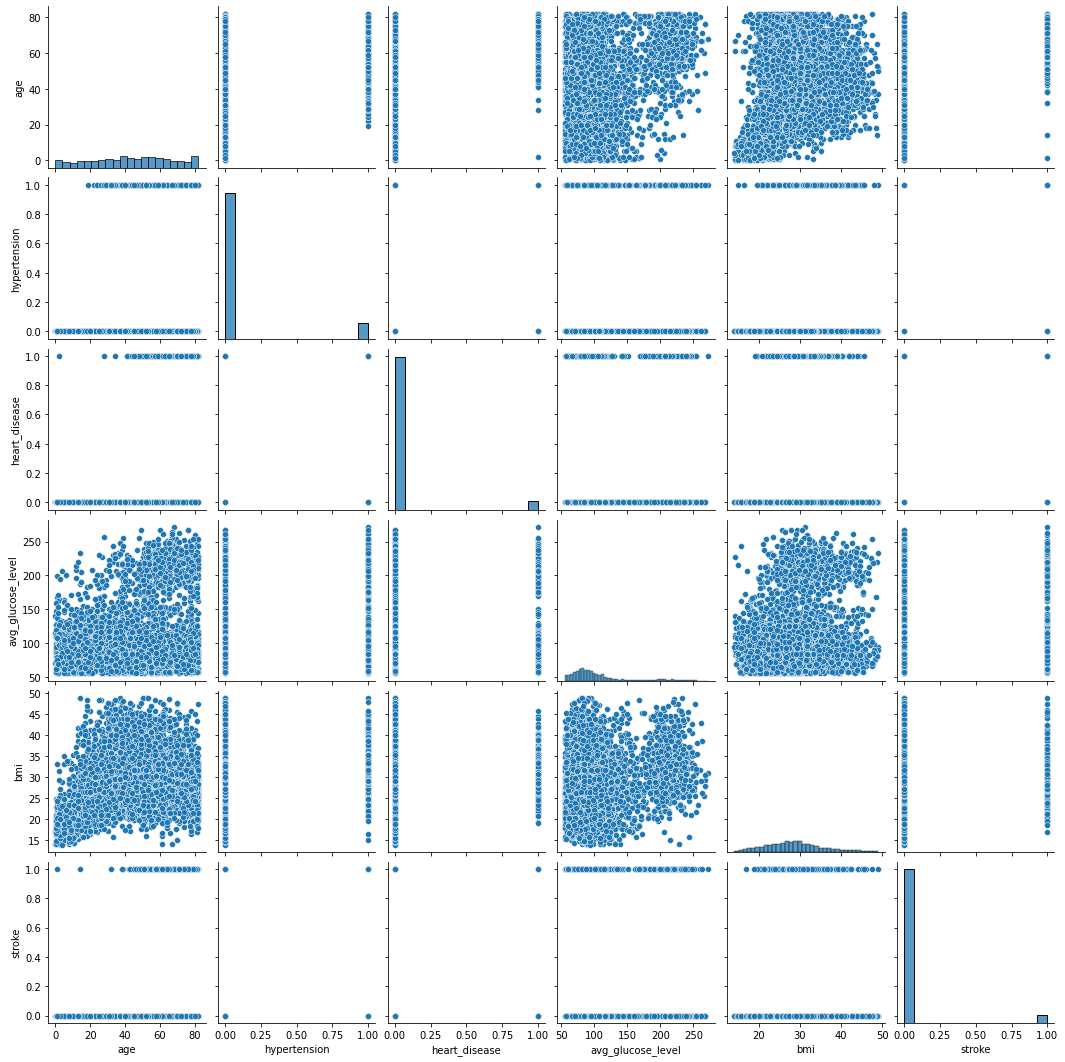

In [ ]:
## perform necessary univariate and multivariate analaysis.
sns.pairplot(df)
plt.show()

From the above pairplot we can observe that:
- Most of the individuals whose age is in the range of 0 to 40 don't suffer from any heart diseases exceot in few cases.

- Similarly individuals in the age group of 0 to 20 dont' suffer from Hypertension but the population in the remaining age groups are suffering from HyperTension.

- As age increases the avgglucose level is increasing which is and few exceptional cases the values are very high at a very young age.

- Again wrt age we see that most of the individuals aren't having the desired BMI index as per their age but more than it in more than 80% of the cases.

- Glucose level of a person help in indicating whether or not the person would suffer from brain stroke.



In [ ]:
# To check the correlation 
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


- From the above correlation table we can see that age has a high correlation with all the other features in the dataset as compared to correlation of other individual features with the remaining features of the dataset.

- The correlation between glucose level and hypertension is at 0.170028, similarly hypertension has correlation with bmi and the target variable stroke.

- The heart disease is also fairly correlated with glucose level and in predicting stroke.

- BMI has a very less correlation with heart_disease and stroke.

### 7. Check the distribution of the target column 'stroke', and comment on the class distribution

In [ ]:
df['stroke'].unique()

array([1, 0])

In [ ]:
df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

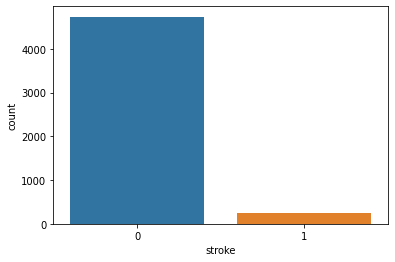

In [ ]:
sns.countplot(df['stroke'])
plt.show()

- The target class is highly imbalanced. 
- In this case the classifier will always predicts the most common class without performing any analysis of the features and it will have a high accuracy rate, where the accuray is not good metric in such cases.
- In such cases we need to go for handling the imbalance dataset using oversampling or downsampling approaches.

## Data Preparation for the Model building

### 8. Segregate the target and independent features.

In [ ]:
X = df.drop('stroke',axis=1)
y = df['stroke']

In [ ]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


### 9. Encode the categorical data.

In [ ]:
X = pd.get_dummies(X,drop_first=True)
X.head(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,0,1,1,0,0
1,80.0,0,1,105.92,32.5,1,1,1,0,0,0,0,1,0


### 10. Handle the imbalanced data using oversampling or undersampling approach, and check the distribution of the resampled target class.

In [ ]:
## Here, we are balancing the imbalanced data using Oversampling approach.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.65)
X_res,y_res = smote.fit_resample(X,y)

In [ ]:
X_res.shape,y_res.shape

((7809, 14), (7809,))

In [ ]:
## Checking the distribution of the resampled target class
pd.DataFrame(y_res).value_counts(normalize=True)*100

stroke
0         60.609553
1         39.390447
dtype: float64

- We can observe, we have successfully oversampled the minority class, and the distribution of the target class is balanced 60%-40%.

### 11. Split the dataset into train and test.

In [ ]:
## Splitting the balanced data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.20, random_state=42)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(6247, 14) (1562, 14)
(6247,) (1562,)


## Model Building and Evaluation

### 13. Build a base model using the Original Imbalanced data.

In [ ]:
## Splitting the original dataset into train and test

X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X,y, test_size=0.20, random_state=42)

print(X_train_base.shape,X_test_base.shape)
print(y_train_base.shape,y_test_base.shape)

(3984, 14) (997, 14)
(3984,) (997,)


In [ ]:
## Building a simple random forest classifier as a base model using original data.
rf = RandomForestClassifier()
rf.fit(X_train_base,y_train_base)

## Prediction on original test data
og_prediction = rf.predict(X_test_base)

## Computing Accuracy, Recall, and Confusion matrix for test data
print("Accuracy:",metrics.accuracy_score(og_prediction,y_test_base))
print("Recall:",metrics.recall_score(og_prediction,y_test_base))
print("Confusion Matrix:\n",metrics.classification_report(og_prediction,y_test_base))

Accuracy: 0.9418254764292878
Recall: 0.0
Confusion Matrix:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       993
           1       0.00      0.00      0.00         4

    accuracy                           0.94       997
   macro avg       0.50      0.47      0.49       997
weighted avg       0.99      0.94      0.97       997



- We can observe that we have a very good accuracy score, `Please note:` we have target which is highly imbalanced and accuracy will be biased and it is not a suitable metric to evaluate the model performance.
- Precision, recall score, and f1-score is good for class 0 (majority class), where as precision, recall, and f1-score is zero for 1(minority class), due to the imbalance dataset.
- So, need to consider Recall score to evaluate the performance of the model. Here we have recall score has 0. (too bad)
- In order to increase our model performance, we need to use the balanced data.

### 13. Model building using the Balanced data.

#### For all the models built below we will follow the below flow:
- Build a base model using the balanced data
- Select K features using Wrapper or Embedded Methods
- Perform hyperparameter tuning on all the models to tune the hyperparameters and find the best hyperparameters.
- Build a pipeline for all the model using the K selected feature and the hyperparameters and build a full model and compute it's accuracy and Recall.
- Once all the above steps are completed, we collectively compare the performance of all the models and find the best performing model.

#### Using RandomForestClassifier 

In [ ]:
## Building a simple random forest classifier as a base model using balanced data.
rf1 = RandomForestClassifier()
rf1.fit(X_train,y_train)

## Prediction on original test data
rf1_base = rf1.predict(X_test)

## Computing Accuracy, Recall, and Confusion matrix for test data
print("Accuracy:",metrics.accuracy_score(rf1_base,y_test))
print("Recall:",metrics.recall_score(rf1_base,y_test))
print("Confusion Matrix:\n",metrics.classification_report(rf1_base,y_test))

Accuracy: 0.9379001280409731
Recall: 0.9310897435897436
Confusion Matrix:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       938
           1       0.91      0.93      0.92       624

    accuracy                           0.94      1562
   macro avg       0.93      0.94      0.94      1562
weighted avg       0.94      0.94      0.94      1562



- On building a base model using the balanced data we see that the performance of the model has increased and the recall for both the classes(0 and 1) are equal to 0.95 and 0.94 which is a good value.

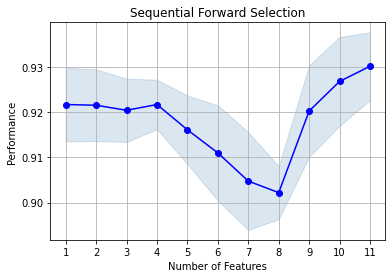

In [ ]:
# Build step forward feature selection
sfs1 = sfs(rf1, k_features=11, forward=True, cv=5)
# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)
sfs2=sfs1.get_metric_dict()
sfs2 = pd.DataFrame.from_dict(sfs2)

fig = plot_sfs(sfs2)

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [ ]:
# Which features?
columnList = list(X)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 3, 4, 6, 7, 8, 9, 11, 12, 13]


In [ ]:
# to fetch the names of the columns using the index
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['age', 'hypertension', 'avg_glucose_level', 'bmi', 'ever_married_Yes', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


## Here we are going to build Random Forest Classification model and Tune the hyperparameters for the same using "GridSearchCV"

In [ ]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4677,70.000000,0,0,212.870000,34.800000,0,1,1,0,0,0,0,1,0
3728,0.720000,0,0,159.790000,19.900000,1,0,0,0,1,0,0,0,0
6137,55.588457,0,0,86.319787,34.065119,1,1,0,0,0,0,0,0,0
6200,69.650904,0,0,267.106463,35.282290,0,1,0,0,0,0,0,0,0
4991,80.000000,1,0,70.008861,31.505030,0,0,0,0,0,0,0,1,0


In [ ]:
X_train_new=pd.DataFrame(X_train[subsetColumnList])
X_test_new=pd.DataFrame(X_test[subsetColumnList])

In [ ]:
X_train_new.shape

(6247, 11)

In [ ]:
col_trans = ColumnTransformer([
    ('ss', StandardScaler(), X_train_new.columns)])

In [ ]:
# Building a pipeline
pipeline = Pipeline([ ('preprocessor',col_trans),  # Scaling the data
    ('algo',RandomForestClassifier(random_state=0, n_jobs=-1))
])

In [ ]:
col_trans.fit(X_train_new)

ColumnTransformer(transformers=[('ss', StandardScaler(),
                                 Index(['age', 'hypertension', 'avg_glucose_level', 'bmi', 'ever_married_Yes',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object'))])

In [ ]:
### Parameters to tune.
param_rf = [{'algo__n_estimators':[100, 200, 500, 1000],
            'algo__max_depth':[7,9, 13,15,19,23,25]}]

In [ ]:
# Create an instance of GridSearchCV as model
grid_cv = GridSearchCV(pipeline,param_rf,cv=5,n_jobs=-1,verbose=1)

#learning
grid_cv.fit(X_train_new,y_train)

# print best hyperparameters from shared set of parameters
print("Best Hyper Parameters:\n",grid_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Hyper Parameters:
 {'algo__max_depth': 23, 'algo__n_estimators': 1000}


In [ ]:
#evaluation(Confusion Matrix)
prediction_GS = grid_cv.predict(X_test_new)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_GS,y_test))

Confusion Matrix:
 [[882  64]
 [ 45 571]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Building a pipeline and passing the transformer and the classfier
# Building a pipeline
pipeline_rf = Pipeline([
    ('preprocessor',col_trans),
    ('algo',RandomForestClassifier(max_depth= 23, n_estimators= 1000,random_state=0, n_jobs=-1))
])

In [ ]:
## Fitting the pipeline on the train data.
pipeline_rf.fit(X_train_new,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ss', StandardScaler(),
                                                  Index(['age', 'hypertension', 'avg_glucose_level', 'bmi', 'ever_married_Yes',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object'))])),
                ('algo',
                 RandomForestClassifier(max_depth=23, n_estimators=1000,
                                        n_jobs=-1, random_state=0))])

In [ ]:
## Prediction on test data
prediction_rf = pipeline_rf.predict(X_test_new)

## Computing Accuracy, Recall, and Confusion matrix for test data
print("Accuracy:",metrics.accuracy_score(prediction_rf,y_test))
print("Recall:",metrics.recall_score(prediction_rf,y_test))
print("Confusion Matrix:\n",metrics.classification_report(prediction_rf,y_test))

Accuracy: 0.9302176696542894
Recall: 0.926948051948052
Confusion Matrix:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       946
           1       0.90      0.93      0.91       616

    accuracy                           0.93      1562
   macro avg       0.93      0.93      0.93      1562
weighted avg       0.93      0.93      0.93      1562



#### Using DecisionTreeRegressor 

In [ ]:
## Building a simple random forest classifier as a base model using original data.
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

## Prediction on original test data
og_prediction_dt = dt.predict(X_test)

## Computing Accuracy, Recall, and Confusion matrix for test data
print("Accuracy:",metrics.accuracy_score(og_prediction_dt,y_test))
print("Recall:",metrics.recall_score(og_prediction_dt,y_test))
print("Confusion Matrix:\n",metrics.classification_report(og_prediction_dt,y_test))

Accuracy: 0.912932138284251
Recall: 0.8941548183254344
Confusion Matrix:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       929
           1       0.89      0.89      0.89       633

    accuracy                           0.91      1562
   macro avg       0.91      0.91      0.91      1562
weighted avg       0.91      0.91      0.91      1562



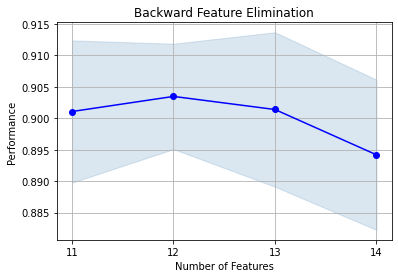

In [ ]:
# Build step forward feature selection
sfs1 = sfs(dt, k_features=11, forward=False, cv=5)
# Perform SFFS
sfs1 = sfs1.fit(X_train.values, y_train)
sfs2=sfs1.get_metric_dict()
sfs2 = pd.DataFrame.from_dict(sfs2)

fig = plot_sfs(sfs2)

plt.title('Backward Feature Elimination')
plt.grid()
plt.show()

In [ ]:
# Which features?
columnList = list(X_train)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 3, 4, 5, 6, 7, 8, 11, 12, 13]


In [ ]:
# to fetch the names of the columns using the index
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['age', 'hypertension', 'avg_glucose_level', 'bmi', 'gender_Male', 'ever_married_Yes', 'work_type_Private', 'work_type_Self-employed', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


In [ ]:
## Here we are going to build Decision Regression model and Tune the hyperparameters for the same using "GridSearchCV"

In [ ]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4677,70.000000,0,0,212.870000,34.800000,0,1,1,0,0,0,0,1,0
3728,0.720000,0,0,159.790000,19.900000,1,0,0,0,1,0,0,0,0
6137,55.588457,0,0,86.319787,34.065119,1,1,0,0,0,0,0,0,0
6200,69.650904,0,0,267.106463,35.282290,0,1,0,0,0,0,0,0,0
4991,80.000000,1,0,70.008861,31.505030,0,0,0,0,0,0,0,1,0


In [ ]:
X_train_new=pd.DataFrame(X_train[subsetColumnList])
X_test_new=pd.DataFrame(X_test[subsetColumnList])

In [ ]:
X_train_new.shape

(6247, 11)

In [ ]:
col_trans = ColumnTransformer([
    ('ss', StandardScaler(), X_train_new.columns)])

In [ ]:
# Building a pipeline
pipeline = Pipeline([ ('preprocessor',col_trans),  # Scaling the data
    ('algo',DecisionTreeClassifier())
])

In [ ]:
col_trans.fit(X_train_new)

ColumnTransformer(transformers=[('ss', StandardScaler(),
                                 Index(['age', 'hypertension', 'avg_glucose_level', 'bmi', 'gender_Male',
       'ever_married_Yes', 'work_type_Private', 'work_type_Self-employed',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object'))])

In [ ]:
### Parameters to tune.
param_rf = [{'algo__criterion':['gini', 'entropy'],
            'algo__max_depth':(7,25)}]

In [ ]:
# Create an instance of RandomizedSearchCV as model
random_cv = RandomizedSearchCV(pipeline,param_rf,cv=5,n_jobs=-1,verbose=1)

#learning
random_cv.fit(X_train_new,y_train)

# print best hyperparameters from shared set of parameters
print("Best Hyper Parameters:\n",random_cv.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyper Parameters:
 {'algo__max_depth': 25, 'algo__criterion': 'gini'}


In [ ]:
#evaluation(Confusion Matrix)
prediction_RS = random_cv.predict(X_test_new)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_RS,y_test))

Confusion Matrix:
 [[852  73]
 [ 75 562]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Building a pipeline and passing the transformer and the classfier
# Building a pipeline
pipeline_dt = Pipeline([
    ('preprocessor',col_trans),
    ('algo',DecisionTreeClassifier(max_depth= 23, criterion= 'gini',random_state=0))
])

In [ ]:
## Fitting the pipeline on the train data.
pipeline_dt.fit(X_train_new,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ss', StandardScaler(),
                                                  Index(['age', 'hypertension', 'avg_glucose_level', 'bmi', 'gender_Male',
       'ever_married_Yes', 'work_type_Private', 'work_type_Self-employed',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object'))])),
                ('algo', DecisionTreeClassifier(max_depth=23, random_state=0))])

In [ ]:
## Prediction on test data
prediction_dt = pipeline_dt.predict(X_test_new)

## Computing Accuracy, Recall, and Confusion matrix for test data
print("Accuracy:",metrics.accuracy_score(prediction_dt,y_test))
print("Recall:",metrics.recall_score(prediction_dt,y_test))
print("Confusion Matrix:\n",metrics.classification_report(prediction_dt,y_test))

Accuracy: 0.9090909090909091
Recall: 0.8857589984350548
Confusion Matrix:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       923
           1       0.89      0.89      0.89       639

    accuracy                           0.91      1562
   macro avg       0.91      0.91      0.91      1562
weighted avg       0.91      0.91      0.91      1562



## Conclusions:

### 16. Compare the evaluation metrics of the base model with imbalanced data, and the best performing model with balanced data, and write your conclusion. Mention the steps taken to improve the performance of the model.

In [ ]:
print('\033[1;46;13m Performance of Base model on Imbalanced Data:\033[0;0m')
print("Accuracy:",metrics.accuracy_score(og_prediction,y_test_base))
print("Recall:",metrics.recall_score(og_prediction,y_test_base))
print("Confusion Matrix:\n",metrics.classification_report(og_prediction,y_test_base))
print('--'*50)

print('\033[1;46;13m Performance of Random Forest Algorithm with tuned hyperparameters, on Balanced Data:\033[0;0m')
print("Accuracy:",metrics.accuracy_score(prediction_rf,y_test))
print("Recall:",metrics.recall_score(prediction_rf,y_test))
print("Confusion Matrix:\n",metrics.classification_report(prediction_rf,y_test))
print('--'*50)

 Performance of Base model on Imbalanced Data:
Accuracy: 0.9418254764292878
Recall: 0.0
Confusion Matrix:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       993
           1       0.00      0.00      0.00         4

    accuracy                           0.94       997
   macro avg       0.50      0.47      0.49       997
weighted avg       0.99      0.94      0.97       997

----------------------------------------------------------------------------------------------------
 Performance of Random Forest Algorithm with tuned hyperparameters, on Balanced Data:
Accuracy: 0.9302176696542894
Recall: 0.926948051948052
Confusion Matrix:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       946
           1       0.90      0.93      0.91       616

    accuracy                           0.93      1562
   macro avg       0.93      0.93      0.93      1562
weighted avg       0.93      0.93

To conclude:
- We can observe from the above results comparison of base model and the tuned model, we can clearly see the impact of handling imbalanced data, feature selection and hyperparameter tuning, we had a recall score of zero where we used original imbalanced data, after we handled imbalanced data and selected best K features and tuned hyperparameters, we have a recall score greater than 80% for random forest classifier model and the decision tree classifier model.
- First we have balanced our imbalanced data using Oversampling approach.
- We had around 14 features in the balanced dataset. Out of 14 features we selected K=11 as the best features based on the feature importance.
- Then we have tuned the hyperparameters for the Random Forest Classifier using the GridSearchCV with 5folds on the K best features.(the best combination of hyperparameters were 'max_depth': 23, 'n_estimators': 500}).
- We have also tuned the hyperparameters for the Decision Tree Classifier using the RandomozedSearchCV with 5folds on the K best features.(the best combination of hyperparameters were 'max_depth': 25, 'criterion': 'gini'}).
- Then we have built a pipeline, where when we pass the train data with best features, it will first scale the data, and then fit the RF and DT model with tuned parameters.
- From the both models that we have built we would prefer Random Forest algorithm over the Decision Tree Classifier based on the algorithm performance on the data. 
- In this notebook, we have tried only a single approch when comes to balancing the data, two methods of feature selection, and have implemented two models for model selection and performed respective hyperparameter tuning. Further, we can try out different data balancing approach, feature selection, and different models and hyperparameters to get best results.